## **EN2550 Assignment 2 on Fitting and Alignment** 
### *by Rajapaksha R.M.P.A.P. - 190484T* 


In [1]:
# importing libraries 
import numpy as np
from scipy import linalg 
from scipy.optimize import minimize 
import cv2 as cv 
import matplotlib.pyplot as plt 
%matplotlib inline 

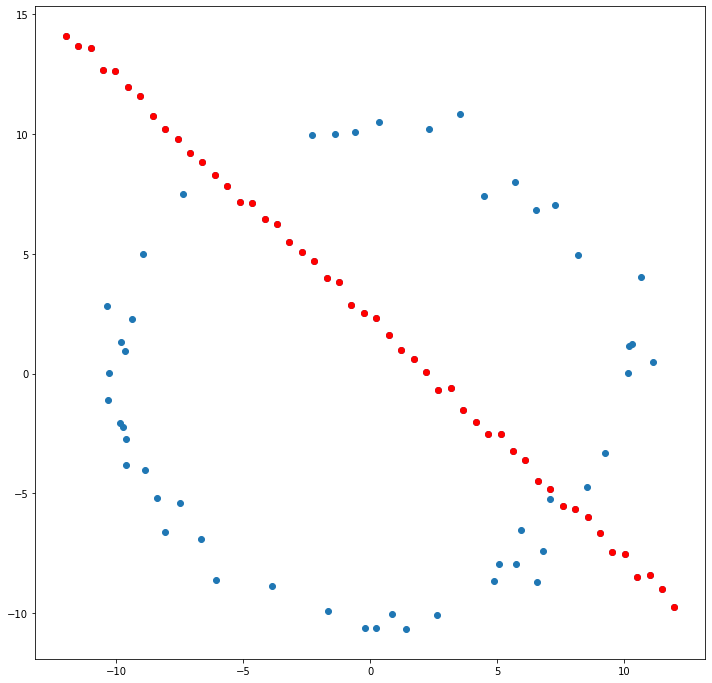

In [8]:
# ************************** question 1 ***************************** 

N = 100     # total number of points 
half_n = N//2 

# creating a cluster of random points around a known circle 
r = 10      # radius 
s = r/16    # variance 

t = np.random.uniform(0, 2*np.pi, half_n) 
n = s * np.random.randn(half_n) 

x, y = (r+n)*np.cos(t), (r+n)*np.sin(t) 
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

# creating a cluster of random points around a known straight line 
m, b = -1, 2
x = np.linspace(-12, 12, half_n) 
y = m*x + b + s*np.random.rand(half_n) 
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1))) 
X = np.vstack((X_circ, X_line)) 

# plotting the results 
fig, ax = plt.subplots(figsize = (12, 12)) 
ax.scatter(X[:, 0], X[:, 1], marker = 'o') 
ax.scatter(X_line[:, 0], X_line[:, 1], c = 'r', marker = 'o') 

How to use the RANSAC method to find the best fitting circle? 
- step 1 - randomly choose a set of 3 points from the data cluster. $[s = 3]$ 
- step 2 - finding the corresponding circumscribed circle for the selected 3 points. 
- step 3 - finding the inlier count. 
            Here, what points are considered to be inliers? Here, the Inliers are considered to be the points that reside within a certain threshold distance from the circumference of the circle. 
- step 4 - repeat the process for N times. 

Finally, choose the one that has the highest inlier count, and if that inlier count is greater than the expected minimum inlier count (consensus set size), then find the fitting circle for those inliers. 